### Regression and Difference-in-Means

- The Regression Coefficient and Difference-in-Means estimator are the same.

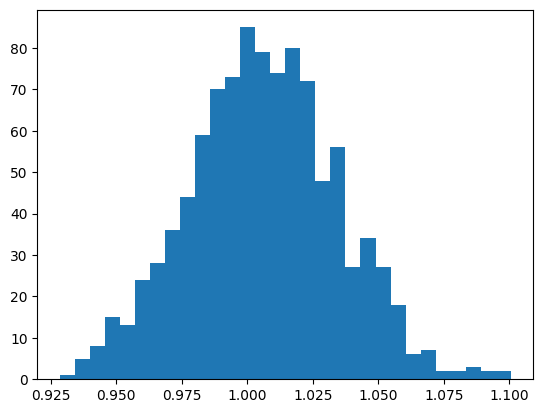

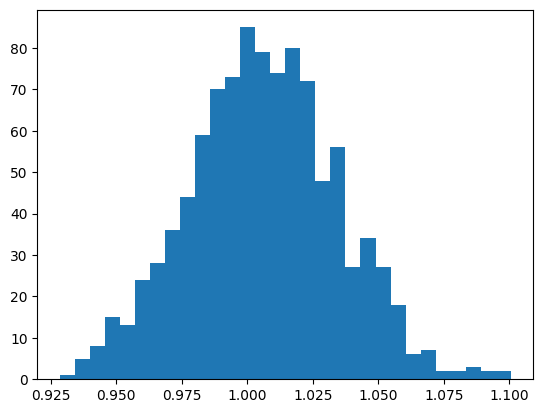

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 100
Y_0 = np.random.normal(1,0.2,N)
Y_1 = np.random.normal(2,0.2,N)
ATE = 1

beta_hats = []
tau_hats = []
for k in range(1000):
    T = np.random.binomial(1,0.5,N)
    Y = T * Y_1 + (1-T)*Y_0
    beta_hat = np.cov(Y,T)[0,1]/np.cov(Y,T)[1,1]
    beta_hats.append(beta_hat)
    tau_hat = np.mean(Y[T==1]) - np.mean(Y[T==0])
    tau_hats.append(tau_hat)
plt.hist(tau_hats, bins = 30)
plt.show()
plt.hist(beta_hats, bins = 30)
plt.show()

### Regression and Randomization

- Even when treatment has been randomization, controlling for other relevant factors helps improve the fit, reduce the errors and thus improves the SE of the estimated ATE.
- This does involve that the average treatment effect varies linearly with X.
- If the POs are given by,  

$$ Y_0 = \mu_0 + a_0 X + e_0$$
$$ Y_1 = \mu_1 + a_0 X + e_1$$
$$ e_0, e_1 \sim N(0,\sigma^2)$$

$$ \tau(x) = E[Y_1 - Y_0 | X = x] = \mu_1 - \mu_0$$

So the ATE $\tau(x)$ varies with $X=x$. Then the outcome is,

$$ Y = T Y_1 + (1-T) Y_0$$
$$ Y = T (\mu_1 + a_0 X  + e_0) + (1-T) (\mu_0 + a_0 X + e_1)$$
$$ Y = \mu_0 + a_0 X + e_0 + (\mu_1 - \mu_0 + e_1 - e_0) T$$
$$ E[Y|T,X] = \mu_0 + a_0 X + (\mu_1 - \mu_0) T$$
$$ E[Y|T,X] = \mu_0 + \alpha X + \tau T$$
$$ E[Y|T,X=x] = \alpha(x) + \tau T$$

- So a regression of $Y$ on $T$ controlling for $X$ allows us to compute how the intercept varies accross X. In this example, the ATE remains the same i.e. $\tau$.

So what is the benefit?
- If $\alpha>0$ then controlling for $X$ improves the fit of the regression model. Thus that helps reduce the standard errors on $\hat{\tau}$.
- Hence controlling for relevant factors that may influence the potential outcomes will improve the precision of ATE estimate. However, if the data is large enough we can already obtain sharp estimates of ATE.




In [10]:
# Data
mu0 = 1
mu1 = 2
a0 = 1
n = 1000
x = np.random.normal(0,1,n)
y0 = np.random.normal(mu0 + a0 * x, 1, n)
y1 = np.random.normal(mu1 + a0 * x, 1, n)
t = np.random.binomial(1,0.5,N)
y = t*y1 + (1-t)*y0

import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.DataFrame(np.c_[Y,T,X], columns = ['y', 't', 'x'])
print(smf.ols(formula='y ~ t', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.78e-31
Time:                        07:48:56   Log-Likelihood:                -1740.6
No. Observations:                1000   AIC:                             3485.
Df Residuals:                     998   BIC:                             3495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9143      0.062     14.687      0.0

In [12]:
print(smf.ols(formula='y ~ t + x', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     549.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.34e-161
Time:                        07:49:05   Log-Likelihood:                -1433.4
No. Observations:                1000   AIC:                             2873.
Df Residuals:                     997   BIC:                             2888.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0437      0.045     23.378      0.0

### Regression and Confounding

- So far we considered covariates $X$ that also influence potential outcomes. But what if they also influences the assignment of the treatment. In this example, it

$$ Y_0 = \mu_0 + a_0 X + e_0$$
$$ Y_1 = \mu_1 + a_0 X + e_1$$
$$ e_0, e_1 \sim N(0,\sigma^2)$$
$$ \tau = E[Y_1 - Y_0 | X = x] = \mu_1 - \mu_0$$

and let the treatment be influences by the covariate,

$$ T \sim BER(a+bX) $$
$$ Y = T Y_1 + (1-T) Y_0$$
$$ Y = T (\mu_1 + a_0 X + e_0) + (1-T) (\mu_0 + a_0 X + e_1)$$
$$ Y = \mu_0 + a_0 X + e_0 + (\mu_1 - \mu_0 + e_1 - e_0) T$$
$$ E[Y|T,X] = \mu_0 + a_0 X + (\mu_1 - \mu_0) T$$
$$ E[Y|T,X] = \mu_0 + \alpha X + \tau T$$
$$ Cov(X,T) \not = 0$$

- In this case, the exogenity assumption is violated if we omit $X$.
- This would be omitted variable bias. And thus, OLS estimates of $\tau$ will not be consistent.
- Note, all along so far the ATE estimate has been a constant and unchanging with $X$.

In [18]:
# Data
mu0 = 1
mu1 = 2
a0 = 1
a = 0.2
b = 0.5
n = 1000
x = np.random.binomial(1,0.5,n)
y0 = np.random.normal(mu0 + a0 * x, 1, n)
y1 = np.random.normal(mu1 + a0 * x, 1, n)
t = np.random.binomial(1, a + b * x, n)
y = t*y1 + (1-t)*y0

import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.DataFrame(np.c_[y, t, x], columns = ['y', 't', 'x'])
print(smf.ols(formula='y ~ t', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     443.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           9.34e-82
Time:                        08:02:38   Log-Likelihood:                -1504.6
No. Observations:                1000   AIC:                             3013.
Df Residuals:                     998   BIC:                             3023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2686      0.046     27.674      0.0

In [19]:
print(smf.ols(formula='y ~ t + x', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     328.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.88e-110
Time:                        08:02:38   Log-Likelihood:                -1435.5
No. Observations:                1000   AIC:                             2877.
Df Residuals:                     997   BIC:                             2892.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0356      0.047     22.085      0.0

### Regression and Conditional Avg. Treatment Effects

- ATE may also changes with covariates, if the POs are given by,  

$$ Y_0 = \mu_0 + a_0 X + e_0$$
$$ Y_1 = \mu_1 + a_1 X + e_1$$
$$ \tau(x) = E[Y_1 - Y_0 | X = x] = (\mu_1 - \mu_0) + (a_1 - a_0) X = \alpha + \beta X$$
$$ E[\tau(x)] = E[Y_1 - Y_0] = \alpha + \beta E[X]$$

So the ATE $\tau(x)$ varies with $X=x$. Then the outcome is,

$$ Y = T Y_1 + (1-T) Y_0$$
$$ Y = T (\mu_1 + a_1 X + e_1) + (1-T) (\mu_0 + a_0 X + e_0)$$
$$ Y = \mu_0 + a_0 X + e_0 + (\mu_1 - \mu_0 + (a_1 - a_0) X + e_1 -e_0) T$$
$$ E[Y|T,X] = \mu_0 + a_0 X + (\mu_1 - \mu_0 + (a_1 - a_0) X) T$$
$$ E[Y|T,X=x] = \mu_0 + a_0 X  + (\mu_1 - \mu_0) T + (a_1 - a_0) X T$$
$$ E[Y|T,X=x] = \alpha + \lambda X + \beta T + \gamma X T$$

- So a regression of $Y$ on $T$ controlling for $X$ and allowing an interaction allows us to compute how the ATE varies with covariates. $\tau(x)$ is also conditional ATE or CATE.

$$ E[Y|T,X=x] = \mu(x) + \tau(x)T$$

- Note, in this model there is no confounding. So treatment can be randomized. However, the mere presence of $X$ cause not only the ATE to change (if $a_0 \not = a_1$) but also the intercept (if $a_0>0$).
- So leaving $X$ out of the regression will not cause the ATE to be inconsistent. But our ATE will be converge to its value at the average $X$, i.e. $\alpha + \beta E[X]$.
- If there is selection, then it is possible to just control for $X$ without any intercept, to get the OLS estimator consistent to the avg. ATE.


In [30]:
# Data
mu0 = 1
mu1 = 2
a0 = 1
a1 = 2
a = 0.5
b = 0 # no selection
n = 1000
x = np.random.binomial(1,0.5,n)
y0 = np.random.normal(mu0 + a0 * x, 1, n)
y1 = np.random.normal(mu1 + a1 * x, 1, n)
t = np.random.binomial(1, a + b * x, n)
y = t*y1 + (1-t)*y0
tau = y1 - y0
avg_ate_true = (a1 - a0) + (mu1 - mu0) * 0.5
print(avg_ate_true)

import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.DataFrame(np.c_[y, t, x], columns = ['y', 't', 'x'])
print(smf.ols(formula='y ~ t', data=df).fit().summary())

1.5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     323.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           8.19e-63
Time:                        08:32:43   Log-Likelihood:                -1655.1
No. Observations:                1000   AIC:                             3314.
Df Residuals:                     998   BIC:                             3324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5441      0.057     27.210     

In [31]:
print(smf.ols(formula='y ~ t + x', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     534.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.57e-158
Time:                        08:32:49   Log-Likelihood:                -1430.9
No. Observations:                1000   AIC:                             2868.
Df Residuals:                     997   BIC:                             2883.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7597      0.056     13.537      0.0

In [32]:
print(smf.ols(formula='y ~ t + x + t * x', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     401.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.48e-171
Time:                        08:32:50   Log-Likelihood:                -1399.2
No. Observations:                1000   AIC:                             2806.
Df Residuals:                     996   BIC:                             2826.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0186      0.063     16.128      0.0

### Continous Case

In [49]:
import numpy as np
N = 1000
x = np.random.uniform(0,1,N)
alpha = 0.1
beta = 0.6
t = np.random.binomial(1, alpha + beta * x, N)
mu0 = 0.1
mu1 = 0.5
a0 = 0.2
a1 = 0.5
y0 = mu0 + a0 * x
y1 = mu1 + a1 * x
tau = y1 - y0
y = y0 * (1-t) + y * t
df = pd.DataFrame(np.c_[y, t, x], columns = ['y', 't', 'x'])
print(smf.ols(formula='y ~ t', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.156
Date:                Wed, 10 Jan 2024   Prob (F-statistic):             0.0133
Time:                        08:44:48   Log-Likelihood:                 274.53
No. Observations:                1000   AIC:                            -545.1
Df Residuals:                     998   BIC:                            -535.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1830      0.007     24.578      0.0

In [50]:
print(smf.ols(formula='y ~ t + x', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     18.43
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.38e-08
Time:                        08:44:50   Log-Likelihood:                 289.60
No. Observations:                1000   AIC:                            -573.2
Df Residuals:                     997   BIC:                            -558.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1343      0.011     11.708      0.0

In [51]:
print(smf.ols(formula='y ~ t + x + t*x', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     21.89
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           9.82e-14
Time:                        08:44:50   Log-Likelihood:                 303.38
No. Observations:                1000   AIC:                            -598.8
Df Residuals:                     996   BIC:                            -579.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1000      0.013      7.660      0.0

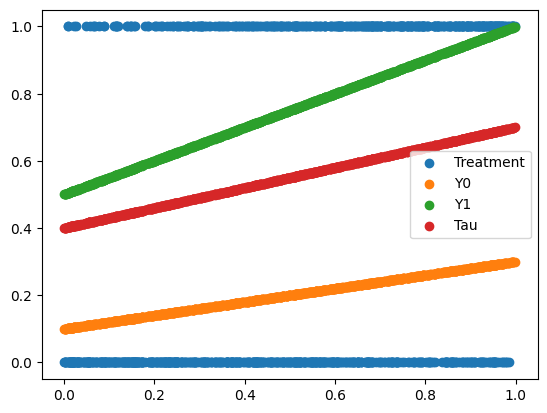

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x, t, label = 'Treatment')
plt.scatter(x, y0, label = 'Y0')
plt.scatter(x, y1, label = 'Y1')
plt.scatter(x, tau, label = 'Tau')
plt.legend()
plt.show()